# Projet numérique : câbles sous-marins

Corentin Hennion, Léa Mailhol 

## Questions théoriques



$\underline{Question~1~:} $
La loi forte des grands nombres nous autorise à estimer l'espérence conditionnelle par la moyenne empirique des simulations conditionnelles. 

$ \underline{Question~2~:}$
On note $\textbf{Z} = \begin{pmatrix} Z(x_{1})=z(x_{1}) \\ ...\\...\\ Z(x_{N})=z(x_{N}) \end{pmatrix} $ le vecteur correspond aux variables aléatoires liées aux points de discrétisation sans observation et $\textbf{W} = \begin{pmatrix} Z(x_{j_1}) \\ ...\\...\\ Z(x_{j_n})\end{pmatrix} $ le vecteur correspondant aux variables aléatoires liées aux points d'observation. 

On cherche la loi de la variable aléatoire $Z|W = w$ où w est le vecteurs des valeurs prises aux points d'observations.

On utilise la résulats du chapitre Probabilité 4 car les vecteurs $\textbf{Z}$ et $\textbf{W}$ sont des vecteurs gaussiens à densité.

On obtient que la foncton de densité de la variable $Z|W = w$ est : 

$$f_{Z|W = w}(x) = \frac{1}{(2\pi)^{(N+1)/2}\sqrt{det(C)}}exp(-\frac{1}{2}(x-m_{Z|W=w})^t C^{-1}(x-m_{Z|W=w}))$$


Avec $ m_{Z|W=w} = \mu - C_{Z,W}C_W^{-1}(w-\mu) $ et $ C = \Sigma - C_{Z,W}C_W^{-1}C_{W,Z}$

La matrice $C_{W,Z}$ a pour coefficients les $C_{W,Z}[i,k] = \sigma_{ij_k} = |x_i - x_{j_k}|$

Donc $Z|W = w$ est un vecteur gaussien à densité d'espérence $ m_{Z|W=w}$ et de matrice de convariance $C$

$ \underline{Question~3~: }$ On prend $Y=(Y_1, ..., ..., Y_p)$ un vecteur de composantes gaussiennes indépendantes d'espérance nulle et de variance 1.

Prenons $Z = m + RY$ avec $m$ vecteur de taille $p$ et $R$ une matrice de taille $p x p$. $Z$ est un vecteur gaussien par combinaison linéaire de vecteurs gaussiens.

Alors chaque composante du vecteur $Z$ a pour espérance $E(Z_i) = m_i + E(\sum_{j=0}^p R_{i,j}\times Y_i) = m_i +\sum_{j=0}^p R_{i,j}  E(Y_{j}) = m_{i}$

Sa matrice de covariance est la matrice $C$ telle que $C_{i,j} = Cov(Z_i, Z_j) = E((Z_i - m_i)(Z_j - m_j)) = E(Z_iZ_j) - m^2 = \sum_{k=0}^p\sum_{l=0}^p r_{ik}r_{jl} E(Y_kY_l)$

Or $E(Y_kY_l) = 0$ si $k\ne l $ car les variables aléatoires sont indépendantes donc $C_{i,j} = \sum_{k=0}^p r_{ik}r_{jk}$

Au final, $Z$ est un vecteur gaussien d'espérance $m$ et de matrice de covariance est $C=RR^t$ 

$\underline{ Question~4~:}$ L'algorithme de simulation conditionnelle va se dérouler comme suit :

On cherche $P_Z$ et on utilise la formule des probabilités totales : $P_Z = \sum_{w} P_{Z|W = w}P(W = w)$ avec Z et W définis en question 2.

On connait les $P(W = w)$ et il nous faut calculer $P_{Z|W = w}$. Comme python ne peut simuler que des variables aléatoires gaussiennes d'espérance nulle et de variance 1, on doit se ramener à $Y_w$ qui est tel que $(Z|W = w) = (m + RY_w) $

Pour cela on calcule $m$ avec l'expression donnée à la question 2 : $m = m_{Z|W=w}$
Et pour $R$ on utilise la résolution python de la factorisation de Cholesky qui est définie par $C=RR^t$ avec $C$ la matrice de la question 2. 

On peut donc simuler la variable $Z|W = w$ en passant par $Y$ est on obtient finalement une simulation de $P_Z$.

## Implementation 

In [62]:
#Chargement de dépendances
import numpy as np
import matplotlib.pyplot as plt
#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
delta = int((B-A)/(N-1))
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12
#Données
observation_indexes = [0,20,40,60,80,100]
observation = np.array(observation_indexes) * Delta
depth = np.array([0,-4,-12.8,-1,-6.5,0])
#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

$ \underline{ Question~1~:}$

In [63]:
def cov(a , sigma2 , mat_dist) :
    if type(mat_dist) == float or int :
        return sigma2 * np.exp(-np.abs(mat_dist)/a)
    else :
        N , n = np.shape(mat_dist)
        matcov = np.empty((N , n))
        for i in range(N) :
            for j in range(n) :
                matcov[i, j] = sigma2 * np.exp(-np.abs(mat_dist[i, j])/a)
        return matcov   

$ \underline{ Question~2~:}$

In [64]:
#la matrice de distance est définie par mat_dist[i,k] = |x[i] - x[k]|
mat_dist = np.array( [[np.abs(discretization[i]-discretization[j]) for i in range (N)] for j in range(N)])
print(mat_dist)

[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


$ \underline{ Question~3~:}$

In [66]:
matcov_Z = cov(a, sigma2, mat_dist)

$ \underline{ Question~4~:}$

In [107]:
n = len(unknown_indexes)
k = len(observation_indexes)

#Entre les observations 
mat_cov_obs = np.array( [[matcov_Z[obs1 , obs2] for obs1 in observation_indexes] for obs2 in observation_indexes])

#Entre les observations et les inconnues
mat_cov_inc_obs = np.array( [[matcov_Z[obs , unk] for obs in observation_indexes] for unk in unknown_indexes])

#Entre les inconnues 
mat_cov_inc = np.array([[matcov_Z[unk1 , unk2] for unk1 in unknown_indexes] for unk2 in unknown_indexes])

$ \underline{ Question~5~:}$

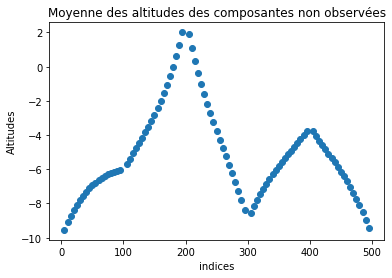

In [108]:
K = np.dot(mat_cov_inc_obs , np.linalg.inv(mat_cov_obs))
esp_inc_sachant_obs = np.array([mu for i in range(n)]) - np.dot(K, (depth- np.array([mu for i in range(k)])))

X = np.array(unknown_indexes) * delta
plt.scatter(X, esp_inc_sachant_obs)
plt.title("Moyenne des altitudes des composantes non observées")
plt.ylabel("Altitudes")
plt.xlabel("indices")
plt.show()

$ \underline{ Question~6~:}$

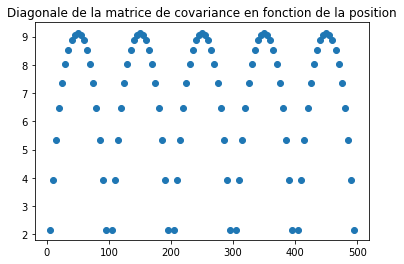

In [109]:
C = mat_cov_inc - np.dot(K, np.transpose(mat_cov_inc_obs))

Y = [C[i, i] for i in range(n)]
plt.scatter(X, Y)
plt.title("Diagonale de la matrice de covariance en fonction de la position")
plt.show()

$ \underline{ Question~7~:}$

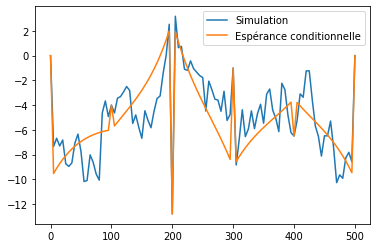

In [123]:
from random import gauss
k = len(observation_indexes)

def simul() : 
    R = np.linalg.cholesky(C)
    Y = np.transpose(np.array([gauss(0,1) for k in range(n)]))
    Z = list(esp_inc_sachant_obs + np.dot(R, Y))
    for i in range(k) :
        Z.insert(observation_indexes[i],depth[i])
    return Z
    
Y_simul = simul()

Y_esp_cond = list(esp_inc_sachant_obs)
for i in range(k) :
    Y_esp_cond.insert(observation_indexes[i],depth[i])
plt.plot(discretization, Y_simul, label= 'Simulation')
plt.plot(discretization, Y_esp_cond, label = 'Espérance conditionnelle')
plt.legend()
plt.show()

$ \underline{ Question~8~:}$

In [124]:
def longueur(Delta, depth) : 
    Z_simul = simul()
    L = 0
    for k in range(n-1) :
        L += np.sqrt(Delta**2 + (Z_simul[k+1] - Z_simul[k])**2)
    return L

print("L =",longueur(delta, depth))

L = 525.6401909577455


$ \underline{ Question~9~:}$

In [127]:
def simul_longueur(n):
    L_simul = 0
    for j in range(n): 
        L_simul += longueur(Delta, depth)  
    return L_simul/n

L_simul = simul_longueur(100) # espérance conditionnelle de la longueur estimée pour 100 simulations

L_esp = 0 # longueur de l'espérance conditionelle
esp = list(esp_inc_sachant_obs)
for i in range(k):
    esp.insert(observation_indexes[i],depth[i])
for j in range(n-1):
    L_esp += np.sqrt(delta**2 + (esp[j+1]-esp[j])**2) 
    
print("L_simul =",L_simul)
print("L_esp =", L_esp)

L_simul = 527.4606852300228
L_esp = 508.2724042242359


L'espérance conditionnelle de la longueur est différente de la longeur de l'espérance conditionnelle.

$ \underline{ Question~10~:}$

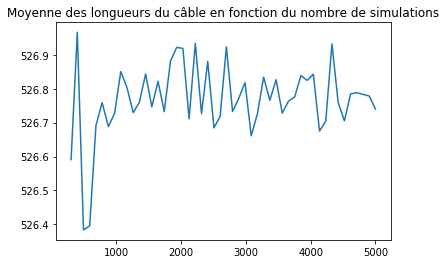

In [128]:
import matplotlib.axes as ax
nb_simul = np.linspace(300, 5000, 50)

Mn = np.array([simul_longueur(int(n)) for n in nb_simul])

plt.plot(nb_simul, Mn)
plt.title("Moyenne des longueurs du câble en fonction du nombre de simulations")
plt.show()

$M_n$ tend vers la longueur de l'espérance de $Z$, cela vérifie la loi forte des grands nombres.

$ \underline{ Question~11~:}$

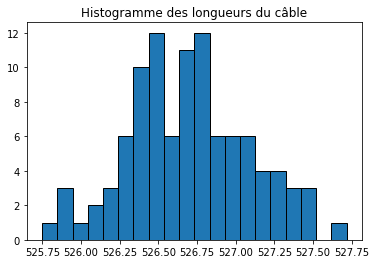

In [129]:
plt.hist([simul_longueur(100) for i in range(100)], bins = 20, edgecolor = "black")
plt.title("Histogramme des longueurs du câble")
plt.show()

$ \underline{ Question~12~:}$

In [130]:
def int_conf95(n) :
    pop = [longueur(Delta, depth) for k in range(n)] #population étudiée : n longueurs simulées
    ec_type = np.std(pop)
    moy = np.average(pop)

    return ([moy - 1.96*ec_type/np.sqrt(n), moy + 1.96*ec_type/np.sqrt(n)])

print("L'intervalle de confiance à 95% est",int_conf95(100))

L'intervalle de confiance à 95% est [526.5035237803883, 528.2965128635179]


$ \underline{ Question~13~:}$

In [131]:
def proba525(n):
    pop = [longueur(Delta, depth) for k in range(n)]
    i = 0 
    for k in range(n):
        if pop[k]>525 :
            i += 1
    return(i/n) 

#utilisation de la loi forte des grands nombres pour estimer cette probabilité

print("La probabilité estimée que la longueur du câble soit supérieure à 525m est", proba525(100))

La probabilité estimée que la longueur du câble soit supérieure à 525m est 0.65


$ \underline{ Question~14~:}$

Pour 1000 simulations :

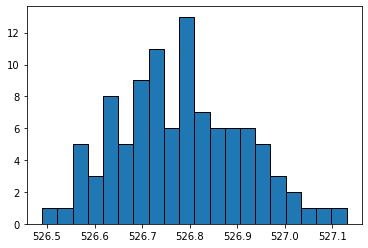

L'intervalle de confiance à 95% est [526.7125891902554, 527.2392592443591]
La probabilité estimée que la longueur du câble soit supérieure à 525m est 0.668


In [133]:
plt.hist([simul_longueur(1000) for i in range(100)], bins = 20, edgecolor = 'black')
plt.title("Histogramme des longueurs du câble du 1000 simulations")
plt.show()

print("L'intervalle de confiance à 95% est",int_conf95(1000))

print("La probabilité estimée que la longueur du câble soit supérieure à 525m est", proba525(1000))

Pour 10000 simulations :

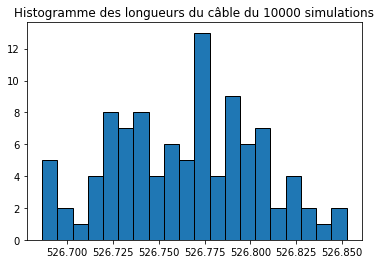

L'intervalle de confiance à 95% est [526.6164608471386, 526.7864211939861]
La probabilité estimée que la longueur du câble soit supérieure à 525m est 0.6523


In [135]:
plt.hist([simul_longueur(10000) for i in range(100)], bins = 20, edgecolor = 'black')
plt.title("Histogramme des longueurs du câble du 10000 simulations")
plt.show()

print("L'intervalle de confiance à 95% est",int_conf95(10000))

print("La probabilité estimée que la longueur du câble soit supérieure à 525m est", proba525(10000))

Pour 100000 simulations :

In [ ]:
plt.hist([simul_longueur(100000) for i in range(100)], bins = 20, edegcolor = 'black')
plt.title("Histogramme des longueurs du câble du 100000 simulations")
plt.show()

print("L'intervalle de confiance à 95% est", int_conf95(100000))

print("La probabilité estimée que la longueur du câble soit supérieure à 525m est", proba525(100000))